<div style="text-align: center;">
    <img src="../../images/CADGbanner.png" alt="Banner curso" style="width:80%">
</div>

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
# Identificar el nombre del archivo netCDF
catalogo = [f for f in os.listdir('.') if f.endswith('.nc')]
name = catalogo[0]
name

'gebco_2023_n23.5437_s17.699_w-160.8618_e-153.8525.nc'

In [12]:
# Leer información del archivo netCDF
ds = nc.Dataset(name)
Lat = ds.variables['lat'][:]
Lon = ds.variables['lon'][:]
Z2 = ds.variables['elevation'][:]
Z = Z2.astype(float)

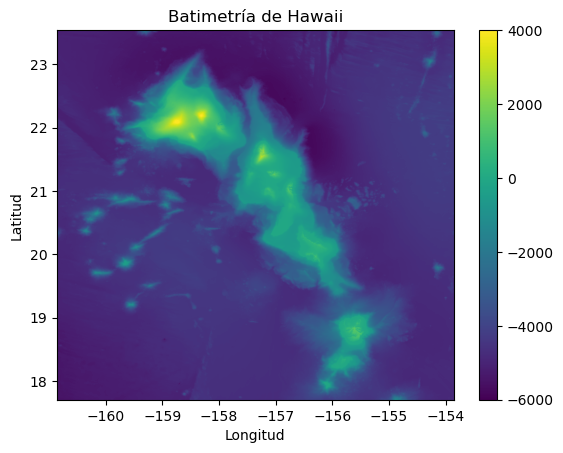

In [13]:
plt.figure()
extent = [Lon.min(), Lon.max(), Lat.min(), Lat.max()]
plt.imshow(Z.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar()
plt.clim(-6000, 4000)
plt.title('Batimetría de Hawaii')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

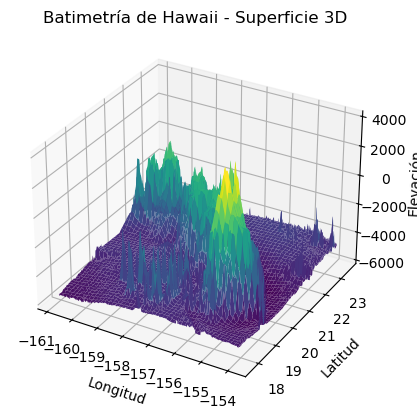

In [19]:
# Gráfico de mesh
Lon_grid, Lat_grid = np.meshgrid(Lon, Lat)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Lon_grid, Lat_grid, Z.T, cmap='viridis')
plt.title('Batimetría de Hawaii - Superficie 3D')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Elevación')
plt.show()

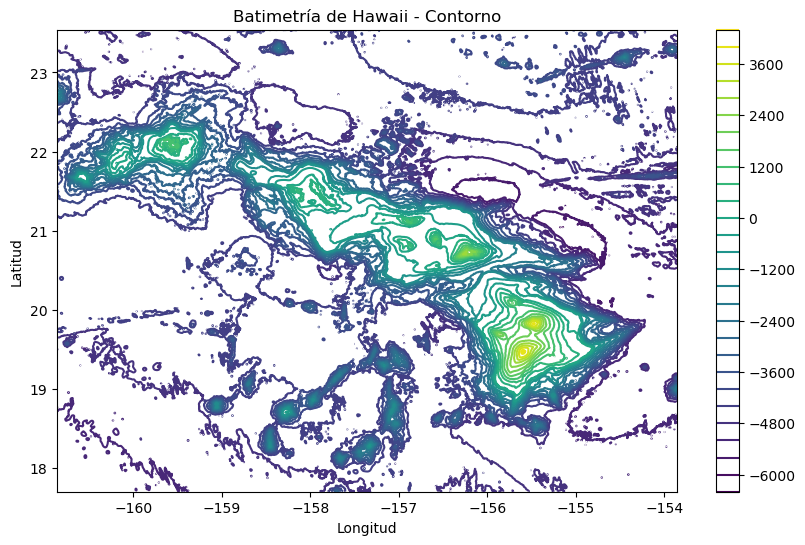

In [22]:
# Crear gráfico de contorno
X, Y = np.meshgrid(Lon, Lat)
plt.figure(figsize=(10, 6))
contour_plot = plt.contour(X, Y, Z.T, 30)
plt.colorbar(contour_plot)
plt.title('Batimetría de Hawaii - Contorno')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

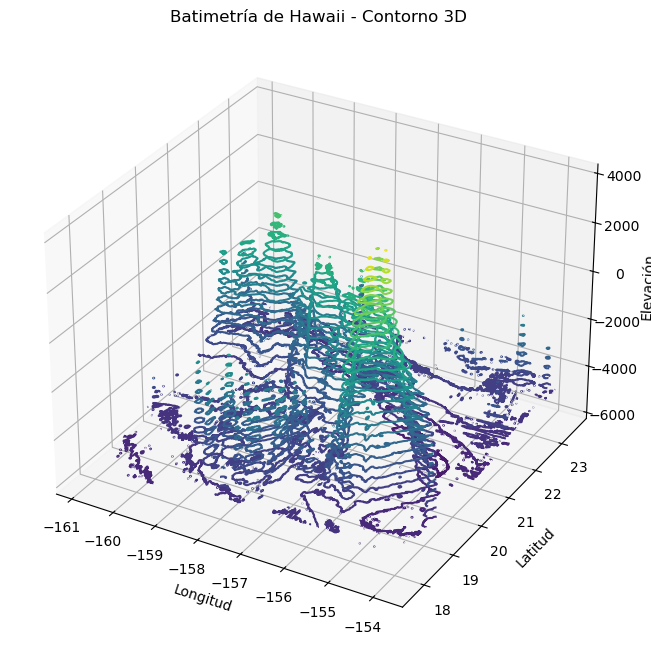

In [23]:
# Contorno 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z.T, 30)
plt.title('Batimetría de Hawaii - Contorno 3D')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Elevación')
plt.show()

TypeError: Dimensions of C (1682, 1402) should be one smaller than X(1682) and Y(1402) while using shading='flat' see help(pcolormesh)

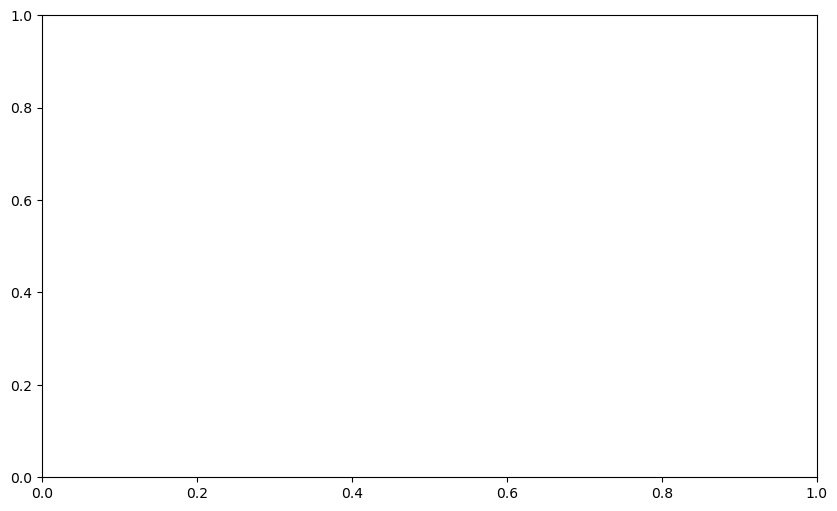

In [35]:
# Crear gráfico de pcolormesh
X, Y = np.meshgrid(Lon, Lat)

plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z.T.T, shading='flat')
plt.colorbar()
plt.clim(-6000, 4000)

# Digitalizar línea de costa (ejemplo)
# Aquí se define una línea de costa de ejemplo
# Asegúrate de definir correctamente las coordenadas de Costa según tu caso
Costa = np.zeros((64, 2))

# Visualizar línea de costa
plt.plot(Costa[:, 1], Costa[:, 0], 'k')

plt.title('Batimetría de Hawaii con Línea de Costa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()